In [1]:
from imageai.Detection import ObjectDetection
from ipywebrtc import CameraStream, ImageRecorder
import numpy as np
import PIL.Image
import io

2024-01-19 16:51:52.402630: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
obj_detect = ObjectDetection()
obj_detect.setModelTypeAsYOLOv3()
obj_detect.setModelPath(r"./yolo.h5")
obj_detect.loadModel()

In [3]:
cam_feed = CameraStream(constraints=
                      {'facing_mode': 'user',
                       'audio': False,
                       'video': { 'width': 640, 'height': 480 }
                       })
cam_feed

CameraStream(constraints={'facing_mode': 'user', 'audio': False, 'video': {'width': 640, 'height': 480}})

In [4]:
image_recorder = ImageRecorder(stream=cam_feed)
image_recorder.recording = True

In [5]:
def image_to_array(image_value):
    im = PIL.Image.open(io.BytesIO(image_value)).convert('RGB')
    #im_array = np.array(im)
    return np.array(im)

1/1 [==============================] - 0s 293ms/step


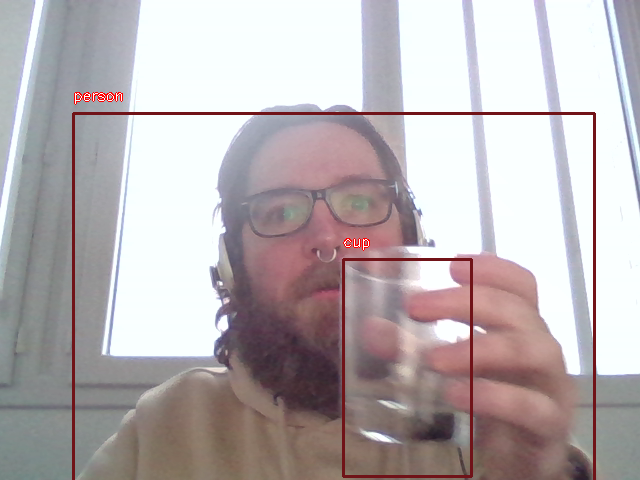

In [18]:
#while True:    
 
image_recorder.recording = True

img = image_to_array(image_recorder.image.value)
annotated_image, preds = obj_detect.detectObjectsFromImage(input_image=img,
                input_type="array",
                output_type="array",
                display_percentage_probability=False,
                display_object_name=True)

PIL.Image.fromarray(annotated_image, 'RGB')

In [19]:
cam_feed.close()